### Encuesta permanente de hogares (Indec)
#### Módulo de  Acceso a Tecnologías
##### Objetivo: Breve análisis sobre el acceso a tecnología e internet en los hogares del territorio argentino

In [28]:
import pandas as pd

datah = pd.read_table("EPH_usu_hog_tic_t421.txt", sep=";")

datah

,CODUSU,NRO_HOGAR,REALIZADA,ANO4,TRIMESTRE,AGLOMERADO,POND_TIC,IH_II_01,IH_II_02
0,TQRMNOPPVHMMLLCDEFIAH00709535,1,1,2021,4,2,629,1,1
1,TQRMNOPPWHLKKSCDEFIAH00714594,1,1,2021,4,2,1098,1,1
2,TQRMNOPPWHLNKNCDEFIAH00714513,1,1,2021,4,2,987,1,1
3,TQRMNOPPWHMMKOCDEFIAH00710151,1,1,2021,4,2,617,1,1
4,TQRMNOPPYHLNKNCDEFIAH00714543,1,1,2021,4,2,893,2,1
...,...,...,...,...,...,...,...,...,...
17005,TQRMNOTRXHJOKMCDEOJAH00697801,1,1,2021,4,93,72,1,1
17006,TQRMNOTRYHJOKMCDEOJAH00697802,1,1,2021,4,93,72,2,2
17007,TQRMNOTSQHJOKMCDEOJAH00697805,1,1,2021,4,93,72,2,2
17008,TQSMNOPWVHMKKUCDEOJAH00720340,1,1,2021,4,93,71,1,1


In [29]:
datah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CODUSU      17010 non-null  object
 1   NRO_HOGAR   17010 non-null  int64 
 2   REALIZADA   17010 non-null  int64 
 3   ANO4        17010 non-null  int64 
 4   TRIMESTRE   17010 non-null  int64 
 5   AGLOMERADO  17010 non-null  int64 
 6   POND_TIC    17010 non-null  int64 
 7   IH_II_01    17010 non-null  int64 
 8   IH_II_02    17010 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.2+ MB


In [30]:
datah[datah["REALIZADA"]==2]    #Todas las encuestas en el registro están realizadas

,CODUSU,NRO_HOGAR,REALIZADA,ANO4,TRIMESTRE,AGLOMERADO,POND_TIC,IH_II_01,IH_II_02


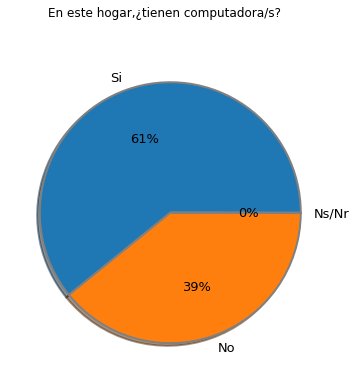

In [31]:
tienepc = datah.groupby(datah.IH_II_01).count()

import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(6,6))
fig1.suptitle("En este hogar,¿tienen computadora/s?")
ax1.pie(tienepc.CODUSU, shadow=True, autopct="%1.0f%%", labels=["Si","No","Ns/Nr"], wedgeprops={"linewidth":2, "edgecolor":"gray"},textprops={"fontsize":13})

plt.show()

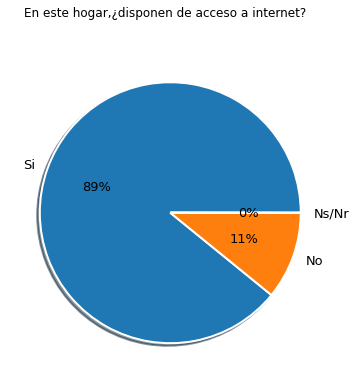

In [33]:
internet = datah.groupby(datah.IH_II_02).count()

fig2, ax2 = plt.subplots(figsize=(6,6))
fig2.suptitle("En este hogar,¿disponen de acceso a internet?")
ax2.pie(internet.CODUSU, shadow=True, autopct="%1.0f%%", labels=["Si","No","Ns/Nr"], wedgeprops={"linewidth":2, "edgecolor":"white"},textprops={"fontsize":13})

plt.show()